In [152]:
import matplotlib.pyplot as plt
import pandas as pd

In [153]:
colors = {}
colorList = ["m", "g", "y", "b", "r"]

def getOrCreateColor(val):
    if val not in colors.keys():
        colors[val] = colorList.pop()
    return colors[val]

def createColorRow(o):
    s = o.copy()
    for index, value in o.items():
        s.at[index] = getOrCreateColor(value)
    return s

def mapSize(o):
    s = o.copy()
    mi = o.min()
    ma = o.max() - mi
    for index, value in o.items():
        s.at[index] = (value - mi) / ma * 140 + 10
    return s

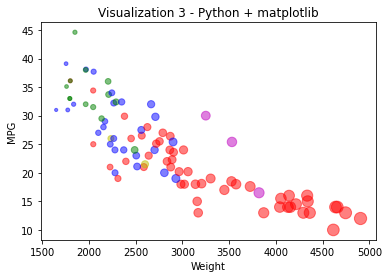

In [154]:
sample = pd.read_csv('../cars-sample.csv').assign(color = lambda row: createColorRow(row.Manufacturer)).assign(size = lambda row: mapSize(row.Weight))

plt.scatter('Weight', 'MPG', 'size', data = sample, color = 'color', alpha = 0.5)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Visualization 3 - Python + matplotlib')
plt.show()